In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


data_info = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
data_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
data_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz') 
data_reviews = pd.read_csv('data/zippedData/rotten_tomatoes_critic_reviews.csv.gz')
data_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')


# Observing the different tables. 

**Considering movie information, budget, and reviews to understand what their data represents.**

In [93]:
data_movies.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [94]:
data_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [95]:
new_movie = data_info.loc[:,('movie_title','critics_consensus','actors','production_company','tomatometer_status','tomatometer_rating','audience_rating','tomatometer_rotten_critics_count')]

new_movie.head(1)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76


In [96]:
data_ratings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [97]:
data_reviews.head(2)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


# Organizing & Cleaning Data

In [98]:
movie_overview= pd.merge(new_movie,data_budgets,how='inner',left_on='movie_title',right_on='movie')

In [99]:
movie_overview2 = pd.merge(movie_overview,data_movies, how='inner', left_on='movie_title',right_on='title')
movie_overview_columnDrop = movie_overview2.drop(['domestic_gross','movie','genre_ids','original_title','title','original_language','release_date_x','id_x'], axis = 1)
movie_overview_columnDrop.head(2)


,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


## Drop Null Values  - if present 

1. **Observation:**

            Checking how many null values are present.

In [100]:
movie_overview_columnDrop.isnull().sum()

movie_title                           0
critics_consensus                   429
actors                               10
production_company                   18
tomatometer_status                    0
tomatometer_rating                    0
audience_rating                       5
tomatometer_rotten_critics_count      0
production_budget                     0
worldwide_gross                       0
id_y                                  0
popularity                            0
release_date_y                        0
vote_average                          0
vote_count                            0
dtype: int64

2. **Sanity Check:**

           Double checking to ensure that we are not removing more that roughly 1% of our tables when removing 
           duplicates.

In [101]:
cellTotal = np.product(movie_overview_columnDrop.shape)

missing_values_count = movie_overview_columnDrop.isnull().sum()
total_missing = missing_values_count.sum()


percent_missing = (total_missing/cellTotal) * 100
print(percent_missing)

1.232


3. **Remove Rows With Empty Values:**

In [102]:
movie_overview_columnDrop

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
2,Criminal,"If you saw Nine Queens, it may feel redundant,...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",Warner Bros. Pictures,Fresh,69.0,57.0,39,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
4,Going the Distance,NaN,"Christopher Jacot, Shawn Roberts, Ryan Bellevi...",Séville Pictures,Rotten,0.0,61.0,5,"$32,000,000","$43,603,990",38073,8.281,2010-09-03,6.0,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,"$85,000,000","$83,080,084",285135,4.180,2014-08-16,3.8,49
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,"$80,000,000","$170,805,525",38317,10.764,2011-07-08,5.3,886
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,"$50,000,000","$55,348,693",329833,12.997,2016-02-12,4.7,1374
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,"$35,000,000","$12,506,188",351065,3.434,2016-09-02,5.5,43


In [103]:
movie_overview_dropNull = movie_overview_columnDrop.dropna()
movie_overview_dropNull.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


## Drop duplicate values - if present 

In [123]:
movie_overview_dropDuplicates = movie_overview_dropNull.drop_duplicates(subset=['movie_title'], keep='last')

**Ensuring that there are no rows without information present**

In [105]:
movie_overview_dropDuplicates.isnull().sum()

movie_title                         0
critics_consensus                   0
actors                              0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
audience_rating                     0
tomatometer_rotten_critics_count    0
production_budget                   0
worldwide_gross                     0
id_y                                0
popularity                          0
release_date_y                      0
vote_average                        0
vote_count                          0
dtype: int64

# Checking Company and Budget

In [106]:
movie_overview_dropDuplicates.head(3)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897


**Data Cleaning: Remove**

Taking dollar signs and commas out of the wide gross and production columns to ensure that they can be divided as integers and or floats.


In [133]:
movie_overview_dropDuplicates['worldwide_gross']= movie_overview_dropDuplicates['worldwide_gross'].str.replace('$','').str.replace(',','')
movie_overview_dropDuplicates['production_budget']= movie_overview_dropDuplicates['production_budget'].str.replace('$','').str.replace(',','')


In [135]:
movie_overview_dropDuplicates['worldwide_gross'] = movie_overview_dropDuplicates.worldwide_gross.astype(int)
movie_overview_dropDuplicates['production_budget'] = movie_overview_dropDuplicates.production_budget.astype(int)




In [136]:
movie_overview_dropDuplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       1455 non-null   object 
 1   critics_consensus                 1455 non-null   object 
 2   actors                            1455 non-null   object 
 3   production_company                1455 non-null   object 
 4   tomatometer_status                1455 non-null   object 
 5   tomatometer_rating                1455 non-null   float64
 6   audience_rating                   1455 non-null   float64
 7   tomatometer_rotten_critics_count  1455 non-null   int64  
 8   production_budget                 1455 non-null   int64  
 9   worldwide_gross                   1455 non-null   int64  
 10  id_y                              1455 non-null   int64  
 11  popularity                        1455 non-null   float64
 12  releas

# Isolating Values to Determine Movie Success


## Adding a New Profit Column, Isolating Columns, and Cleaning Actor Data


### Creating a New Profit Column /  Isolating Columns

1. **Added new profit column.**

In [137]:
movie_overview_dropDuplicates['movie_profit'] = movie_overview_dropDuplicates.worldwide_gross - movie_overview_dropDuplicates.production_budget
movie_overview_dropDuplicates


,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count,movie_profit
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,95000000,223050874,32657,26.691,2010-02-11,6.1,4229,128050874
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,3000000,4570178,40247,5.945,2010-01-22,6.3,81,1570178
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,31500000,38771262,302156,13.651,2016-04-15,5.9,897,7271262
5,Going the Distance,It's timelier and a little more honest than mo...,"Drew Barrymore, Justin Long, Charlie Day, Jaso...",New Line Cinema,Rotten,54.0,52.0,77,32000000,43603990,38073,8.281,2010-09-03,6.0,394,11603990
9,Moonlight,Moonlight uses one man's story to offer a rema...,"Naomie Harris, André Holland, Mahershala Ali, ...",A24 Films,Certified-Fresh,98.0,79.0,7,1500000,65245512,376867,15.948,2016-10-21,7.4,3893,63745512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,85000000,83080084,285135,4.180,2014-08-16,3.8,49,-1919916
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,80000000,170805525,38317,10.764,2011-07-08,5.3,886,90805525
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,50000000,55348693,329833,12.997,2016-02-12,4.7,1374,5348693
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,35000000,12506188,351065,3.434,2016-09-02,5.5,43,-22493812


2. **Creating a new data frame containing our targeted values (columns).**

In [138]:
# isolating columns to study movie success more in depth 
movie_actor_budget = movie_overview_dropDuplicates[['movie_title','actors','tomatometer_status','tomatometer_rating','movie_profit','production_budget']].sort_values(by='production_budget', ascending = False)
                            
movie_actor_budget.reset_index(level=0, inplace=True)


In [139]:
movie_actor_budget = movie_actor_budget.drop(['index'], axis = 1)

In [140]:
movie_actor_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         1455 non-null   object 
 1   actors              1455 non-null   object 
 2   tomatometer_status  1455 non-null   object 
 3   tomatometer_rating  1455 non-null   float64
 4   movie_profit        1455 non-null   int64  
 5   production_budget   1455 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 68.3+ KB


### Actors Cleaning 

1. **Break actor column into a list**


In [141]:
first300 = movie_actor_budget.copy()       #reason to create a shallow copy?
first300.actors = first300.actors.str.split(',') #place each actor into a new list sepparated by commas
first300

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Avatar,"[Zoe Saldana, Sam Worthington, Sigourney Wea...",Certified-Fresh,82.0,2351345279,425000000
1,Pirates of the Caribbean: On Stranger Tides,"[Johnny Depp, Penelope Cruz, Ian McShane, G...",Rotten,33.0,635063875,410600000
2,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Evans, Mark Ruffal...",Certified-Fresh,76.0,1072413963,330600000
3,Spectre,"[Daniel Craig, Christoph Waltz, Naomie Harri...",Fresh,63.0,579620923,300000000
4,Justice League,"[Ben Affleck, Henry Cavill, Amy Adams, Gal ...",Rotten,40.0,355945209,300000000
...,...,...,...,...,...,...
1450,The Gallows,"[Mark Hales, Ryan Wade, Ed Osuna, Jordan Hu...",Rotten,14.0,41556474,100000
1451,Happy Christmas,"[Anna Kendrick, Melanie Lynskey, Mark Webber...",Certified-Fresh,76.0,-39688,70000
1452,Tiny Furniture,"[Lena Dunham, Laurie Simmons, Grace Dunham, ...",Certified-Fresh,80.0,374149,50000
1453,The Signal,"[Laurence Fishburne, Brenton Thwaites, Olivi...",Fresh,61.0,356299,50000


2. **Take duplicate names of Jr. out of the new list of actors**

In [142]:
def fix_jr(list_of_names):
    new_list = []
    new_list_index = 1
    for idx in range(len(list_of_names)): 
        if list_of_names[idx] == ' Jr.':

            new_list[idx-new_list_index] = list_of_names[idx-new_list_index] + list_of_names[idx]   #subtracts old index from new
            new_list_index += 1                                                                     #b/c the list indexes are not(==)
            continue 
                            
        new_list.append(list_of_names[idx])
    return new_list


3. **Applying function on an actor column**

In [143]:
first300['actors'] = first300.actors.apply(fix_jr)

4. **Place actors into separate rows.**

    **We are doing to record the number of each actors occurances within the top 300 profitable movies**

In [144]:
new300 = first300.explode('actors') #Place each actor into their own individual row
new300


,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Avatar,Zoe Saldana,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Sam Worthington,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Sigourney Weaver,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Stephen Lang,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Michelle Rodriguez,Certified-Fresh,82.0,2351345279,425000000
...,...,...,...,...,...,...
1454,This Is Martin Bonner,Paul Eenhoorn,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Richmond Arquette,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Robert Longstreet,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Sam Buchanan,Fresh,93.0,-42000,42000


5. **Code check to ensure that stand alone "jr's" have been removed**

In [145]:
duplicateRowsDF = new300[new300.duplicated('actors')]

#to check ALL ROWS -> might not be necissary 
duplicateRowsDF['actors'].value_counts().head(10)

 Joe Chrest           20
 Michael Peña         20
 Anthony Mackie       18
 Stanley Tucci        18
 Morgan Freeman       16
 Woody Harrelson      16
 Maya Rudolph         15
 Samuel L. Jackson    15
 Ken Jeong            15
 J.K. Simmons         15
Name: actors, dtype: int64

In [166]:
duplicateRowsDF

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
3,Spectre,Stefano Elfi DiClaudia,Fresh,63.0,579620923,300000000
5,Avengers: Infinity War,Robert Downey Jr.,Certified-Fresh,85.0,1748134200,300000000
5,Avengers: Infinity War,Chris Hemsworth,Certified-Fresh,85.0,1748134200,300000000
5,Avengers: Infinity War,Mark Ruffalo,Certified-Fresh,85.0,1748134200,300000000
5,Avengers: Infinity War,Chris Evans,Certified-Fresh,85.0,1748134200,300000000
...,...,...,...,...,...,...
1453,The Signal,Robert Longstreet,Fresh,61.0,356299,50000
1453,The Signal,Jeffrey Grover,Fresh,61.0,356299,50000
1454,This Is Martin Bonner,Richmond Arquette,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Robert Longstreet,Fresh,93.0,-42000,42000


## Breaking 300 movies with highest budgets into 3 sets of 100 to determine...
   * **What movies have been the most successful by finding:** 
           +Tomatometer Rating
           +Total Profit 
    
   * **Actors appearances in the most popular movies** 
    
   * **Companies who commonly produced the most successful movies.**

1. **Code Check: Viewing Our Data Frame**

In [146]:
new300

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Avatar,Zoe Saldana,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Sam Worthington,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Sigourney Weaver,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Stephen Lang,Certified-Fresh,82.0,2351345279,425000000
0,Avatar,Michelle Rodriguez,Certified-Fresh,82.0,2351345279,425000000
...,...,...,...,...,...,...
1454,This Is Martin Bonner,Paul Eenhoorn,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Richmond Arquette,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Robert Longstreet,Fresh,93.0,-42000,42000
1454,This Is Martin Bonner,Sam Buchanan,Fresh,93.0,-42000,42000


**Visualizing the upper and lower threshold**

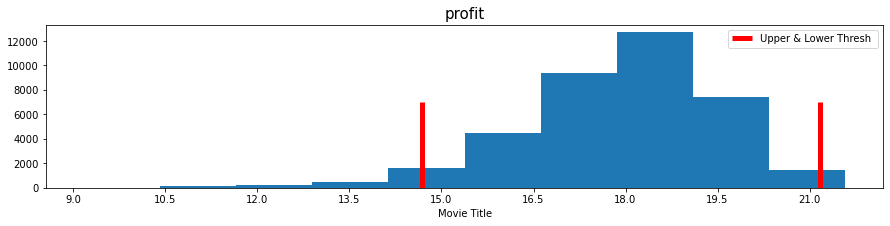

In [147]:

fig, ax = plt.subplots(figsize=(15,3))


frame = new300[new300.movie_profit > 0]

frame['logged_profit'] = np.log(frame.movie_profit)   #finding the log of the movie profits

ax.hist(frame.logged_profit)
upper_thresh = frame.logged_profit.mean() + frame.logged_profit.std() * 2
lower_thresh = frame.logged_profit.mean() - frame.logged_profit.std() * 2
ax.vlines(lower_thresh, ymin=0, ymax=7000, lw=5, color='red')
ax.vlines(upper_thresh, ymin=0, ymax=7000, lw=5, color='red')

# Add labels for x and y axes
ax.set_xlabel('Movie Title')


# Add a title for the plot
ax.set_title('profit', fontsize=15)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# add a legend 
ax.legend(["Upper & Lower Thresh "], loc=1);




In [149]:
drop_outliers = frame[(frame.logged_profit > lower_thresh) & (frame.logged_profit < upper_thresh)]
drop_outliers.head(2)

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget,logged_profit
1,Pirates of the Caribbean: On Stranger Tides,Johnny Depp,Rotten,33.0,635063875,410600000,20.269236
1,Pirates of the Caribbean: On Stranger Tides,Penelope Cruz,Rotten,33.0,635063875,410600000,20.269236


### Profit and Actor

1. **Finding Relationship Between Actors and Profit**

**Isolate actors who have been in 10 or more movies.**

In [359]:
a_list_actors = drop_outliers.actors.value_counts()  #index = 65 
a_list_actors

 Michael Peña        18
 Morgan Freeman      17
 Joe Chrest          17
 Ken Jeong           16
 Anthony Mackie      16
                     ..
 Monica Tamayo        1
 Caliaf St. Aubyn     1
 Tilly Powell         1
 Julia Chantrey       1
 Ryan McPartlin       1
Name: actors, Length: 26082, dtype: int64

In [360]:
a_list_actors = list(a_list_actors[a_list_actors >= 10].index)

In [361]:
top_list_actors = drop_outliers[drop_outliers.actors.isin(a_list_actors)]


> Singling Out 10 Actors who have been apart of the Most Profitable Films

In [362]:
only10 = top_list_actors.groupby('actors').mean().sort_values('movie_profit', ascending=False).head(10)
only10

,tomatometer_rating,movie_profit,production_budget,logged_profit
actors,,,,
Stan Lee,77.857143,6.514434e+08,1.949000e+08,20.216857
Alan Tudyk,64.666667,5.275491e+08,1.276667e+08,19.728657
John Ratzenberger,85.200000,5.006799e+08,1.632500e+08,19.895521
Steve Coogan,60.400000,4.330496e+08,6.890000e+07,19.124078
Michael Caine,59.636364,3.911361e+08,1.278182e+08,19.420312
Idris Elba,71.000000,3.866333e+08,1.385846e+08,19.009065
Scarlett Johansson,81.900000,3.706662e+08,1.123100e+08,18.828986
Samuel L. Jackson,68.571429,3.623627e+08,1.361143e+08,19.112304
Benedict Cumberbatch,71.727273,3.184117e+08,1.235455e+08,18.749905


<AxesSubplot:xlabel='actors', ylabel='movie_profit'>

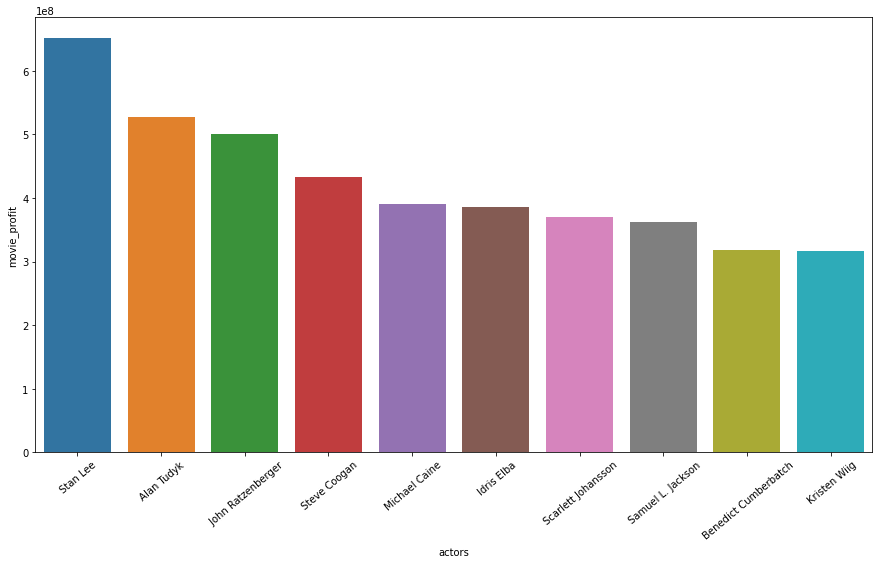

In [327]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=40)


sns.barplot(x= only10.index, y= only10['movie_profit'],saturation=0.75)



### Vizualization for Comparison

In [303]:
movie_actor_budget.sort_values(by='production_budget', ascending = False).iloc[1000:1200]

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
999,Machete,"Danny Trejo, Robert De Niro, Jessica Alba, Che...",Certified-Fresh,72.0,33870970,12500000
1031,Philomena,"Judi Dench, Steve Coogan, Sophie Kennedy Clark...",Certified-Fresh,90.0,86963392,12000000
1020,Wish Upon,"Joey King, Ryan Phillippe, Ki Hong Lee, Mitche...",Rotten,19.0,11477345,12000000
1006,Arbitrage,"Susan Sarandon, Richard Gere, Tim Roth, Brit M...",Certified-Fresh,88.0,23830713,12000000
1008,"Three Billboards Outside Ebbing, Missouri","Frances McDormand, Woody Harrelson, Sam Rockwe...",Certified-Fresh,90.0,148191915,12000000
...,...,...,...,...,...,...
1186,The Possession of Hannah Grace,"Shay Mitchell, Stana Katic, Louis Herthum, Gre...",Rotten,18.0,36785387,6000000
1188,Mandy,"Nicolas Cage, Andrea Riseborough, Linus Roache...",Certified-Fresh,91.0,-4572344,6000000
1197,Emma,"Gwyneth Paltrow, Jeremy Northam, Toni Collette...",Certified-Fresh,85.0,31931658,5900000
1198,Valhalla Rising,"Mads Mikkelsen, Maarten Stevenson, Gordon Brow...",Fresh,73.0,-4968387,5700000


In [225]:
movie_actor_budget

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
93,Mars Needs Moms,"Seth Green, Elisabeth Harnois, Tom Everett Sco...",Rotten,37.0,-110450242,150000000
217,Bright,"Will Smith, Joel Edgerton, Noomi Rapace, Lucy ...",Rotten,28.0,-90000000,90000000
211,The Promise,"Oscar Isaac, Christian Bale, Charlotte Le Bon,...",Rotten,51.0,-79448583,90000000
140,Monster Trucks,"Lucas Till, Jane Levy, Thomas Lennon, Barry Pe...",Rotten,32.0,-63357202,125000000
136,R.I.P.D.,"Ryan Reynolds, Jeff Bridges, Kevin Bacon, Mary...",Rotten,13.0,-50923322,130000000
...,...,...,...,...,...,...
31,Black Panther,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",Certified-Fresh,96.0,1148258224,200000000
42,Furious 7,"Vin Diesel, Paul Walker, Jason Statham, Dwayne...",Certified-Fresh,82.0,1328722794,190000000
22,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Vincent D'On...",Fresh,70.0,1433854864,215000000
5,Avengers: Infinity War,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",Certified-Fresh,85.0,1748134200,300000000


In [310]:
movie_actor_budget2 = movie_actor_budget.copy()

1. **Filtering Out Movies**
    
 **Taking out movies with a profit less than 900,000 and a rating less than 85.**

In [321]:
movie_actor_budget4 = movie_actor_budget2[(movie_actor_budget2.movie_profit > 300000000) & (movie_actor_budget2.tomatometer_rating > 85) & (movie_actor_budget2.production_budget >150000000)]
movie_actor_budget4.sort_values(by='movie_profit', ascending=False, inplace=True)
movie_actor_budget4 = movie_actor_budget4.head(20)
movie_actor_budget4





,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
31,Black Panther,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",Certified-Fresh,96.0,1148258224,200000000
30,Incredibles 2,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H...",Certified-Fresh,93.0,1042520711,200000000
33,Skyfall,"Daniel Craig, Javier Bardem, Judi Dench, Naomi...",Certified-Fresh,92.0,910526981,200000000
11,Captain America: Civil War,"Chris Evans, Robert Downey Jr., Scarlett Johan...",Certified-Fresh,91.0,890069413,250000000
37,Toy Story 3,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty,...",Certified-Fresh,98.0,868879522,200000000
26,Finding Dory,"Ed O'Neill, Dominic West, Andrew Stanton, Benn...",Certified-Fresh,94.0,821215193,200000000
47,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Certified-Fresh,94.0,816996207,185000000
7,The Dark Knight Rises,"Christian Bale, Michael Caine, Gary Oldman, An...",Certified-Fresh,87.0,809439099,275000000
61,Spider-Man: Homecoming,"Tom Holland (II), Michael Keaton, Robert Downe...",Certified-Fresh,92.0,705166350,175000000
60,Inside Out,"Amy Poehler, Phyllis Smith, Richard Kind, Bill...",Certified-Fresh,98.0,679235992,175000000


In [322]:
movie_actor_budget4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 31 to 78
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         20 non-null     object 
 1   actors              20 non-null     object 
 2   tomatometer_status  20 non-null     object 
 3   tomatometer_rating  20 non-null     float64
 4   movie_profit        20 non-null     int64  
 5   production_budget   20 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ KB


> **COMBINED**

In [420]:
import textwrap

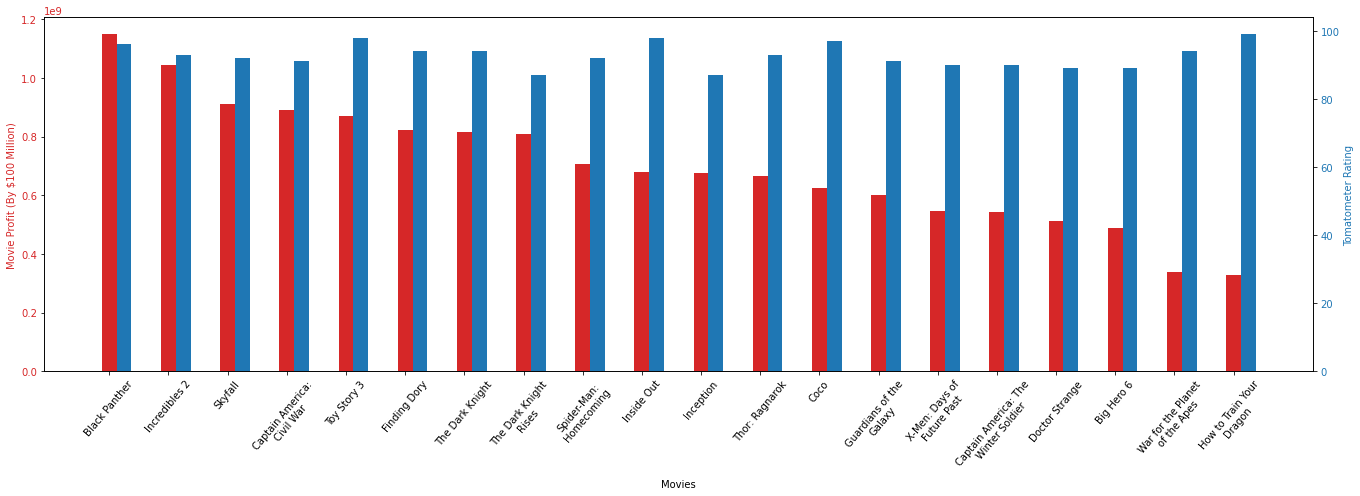

In [432]:
# t = movie_actor_budget3.movie_title
t2 = np.arange(20)
data1 = movie_actor_budget4.movie_profit
data2 = movie_actor_budget4.tomatometer_rating
width = 0.25

fig, ax1 = plt.subplots(figsize=(19,7))

color = 'tab:red'
ax1.set_xlabel('Movies')
ax1.set_ylabel('Movie Profit (By $100 Million)', color=color)
plt.bar(t2, data1, width, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(t2, movie_actor_budget4['movie_title'])
plt.xticks(rotation=50)

#

f = lambda x: textwrap.fill(x.get_text(), 20)
ax1.set_xticklabels(map(f, ax1.get_xticklabels()))


#

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Tomatometer Rating', color=color)  # we already handled the x-label with ax1
plt.bar(t2+width,data2, width, color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Visualizing Actors in Movies

1. **Singling out individual actors in order to  discover what movies the actors from the 10 most profitable movies were in**

**(part1)**

In [340]:
movie_for_actor = movie_actor_budget4.copy()       #reason to create a shallow copy?
movie_for_actor.actors = movie_for_actor.actors.str.split(',') #place each actor into a new list sepparated by commas
movie_for_actor

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
31,Black Panther,"[Chadwick Boseman, Michael B. Jordan, Lupita...",Certified-Fresh,96.0,1148258224,200000000
30,Incredibles 2,"[Craig T. Nelson, Holly Hunter, Sarah Vowell...",Certified-Fresh,93.0,1042520711,200000000
33,Skyfall,"[Daniel Craig, Javier Bardem, Judi Dench, N...",Certified-Fresh,92.0,910526981,200000000
11,Captain America: Civil War,"[Chris Evans, Robert Downey Jr., Scarlett Jo...",Certified-Fresh,91.0,890069413,250000000
37,Toy Story 3,"[Tom Hanks, Tim Allen, Joan Cusack, Ned Bea...",Certified-Fresh,98.0,868879522,200000000
26,Finding Dory,"[Ed O'Neill, Dominic West, Andrew Stanton, ...",Certified-Fresh,94.0,821215193,200000000
47,The Dark Knight,"[Christian Bale, Heath Ledger, Aaron Eckhart...",Certified-Fresh,94.0,816996207,185000000
7,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman,...",Certified-Fresh,87.0,809439099,275000000
61,Spider-Man: Homecoming,"[Tom Holland (II), Michael Keaton, Robert Do...",Certified-Fresh,92.0,705166350,175000000
60,Inside Out,"[Amy Poehler, Phyllis Smith, Richard Kind, ...",Certified-Fresh,98.0,679235992,175000000


In [371]:
movie_for_actor = movie_for_actor.explode('actors')
movie_for_actor

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
31,Black Panther,Chadwick Boseman,Certified-Fresh,96.0,1148258224,200000000
31,Black Panther,Michael B. Jordan,Certified-Fresh,96.0,1148258224,200000000
31,Black Panther,Lupita Nyong'o,Certified-Fresh,96.0,1148258224,200000000
31,Black Panther,Danai Gurira,Certified-Fresh,96.0,1148258224,200000000
31,Black Panther,Martin Freeman,Certified-Fresh,96.0,1148258224,200000000
...,...,...,...,...,...,...
78,How to Train Your Dragon,America Ferrera,Certified-Fresh,99.0,329870992,165000000
78,How to Train Your Dragon,Jonah Hill,Certified-Fresh,99.0,329870992,165000000
78,How to Train Your Dragon,Christopher Mintz-Plasse,Certified-Fresh,99.0,329870992,165000000
78,How to Train Your Dragon,Kristen Wiig,Certified-Fresh,99.0,329870992,165000000


**(part2)**

In [372]:
actors_in_movies = movie_for_actor[movie_for_actor.actors.isin(only10.index)]


In [373]:
actors_in_movies


,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
31,Black Panther,Stan Lee,Certified-Fresh,96.0,1148258224,200000000
30,Incredibles 2,Samuel L. Jackson,Certified-Fresh,93.0,1042520711,200000000
11,Captain America: Civil War,Scarlett Johansson,Certified-Fresh,91.0,890069413,250000000
11,Captain America: Civil War,Stan Lee,Certified-Fresh,91.0,890069413,250000000
37,Toy Story 3,John Ratzenberger,Certified-Fresh,98.0,868879522,200000000
26,Finding Dory,John Ratzenberger,Certified-Fresh,94.0,821215193,200000000
26,Finding Dory,Idris Elba,Certified-Fresh,94.0,821215193,200000000
47,The Dark Knight,Michael Caine,Certified-Fresh,94.0,816996207,185000000
7,The Dark Knight Rises,Michael Caine,Certified-Fresh,87.0,809439099,275000000
61,Spider-Man: Homecoming,Stan Lee,Certified-Fresh,92.0,705166350,175000000


In [ ]:
actor_occurance_num = 


ConversionError: Failed to convert value(s) to axis units: 31                 Stan Lee
30        Samuel L. Jackson
11       Scarlett Johansson
11                 Stan Lee
37        John Ratzenberger
26        John Ratzenberger
26               Idris Elba
47            Michael Caine
7             Michael Caine
61                 Stan Lee
60        John Ratzenberger
83            Michael Caine
56     Benedict Cumberbatch
56               Idris Elba
63        John Ratzenberger
73                 Stan Lee
71        Samuel L. Jackson
71       Scarlett Johansson
71                 Stan Lee
76               Alan Tudyk
76                 Stan Lee
78             Kristen Wiig
Name: actors, dtype: object

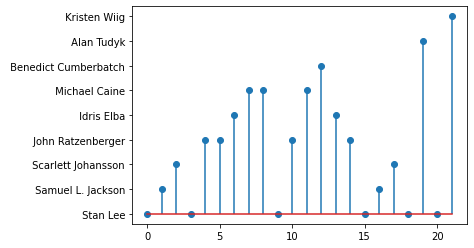

In [378]:
 
# Make the plot
plt.stem(actors_in_movies['actors'])
plt.xticks(actors_in_movies['actors'], actors_in_movies['movie_title'])
plt.show()